In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bandits_utils import *

In [2]:
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', 
                        names = ['UserID', 'MovieID', 'Rating', 'Timestamp'],
                        encoding = 'latin1',
                        engine = 'python')
movies  = pd.read_table('ml-1m/movies.dat',  sep='::',
                        names = ['MovieID', 'Title', 'Genres'], 
                        encoding = 'latin1',
                        engine ='python')
users   = pd.read_table('ml-1m/users.dat',  sep='::', 
                        names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip'], 
                        encoding = 'latin1',
                        engine = 'python')

# Films with sufficient numbers of reviews
Let's just get those titles which have at least N reviews

The output is **ratings_topN**

In [3]:
N = 1000
ratings_count = ratings.groupby(by='MovieID', as_index=True).size()
# top_ratings = ratings_count.sort_values(ascending=False)[:N]
top_ratings = ratings_count[ratings_count>=N]
top_ratings.head(3)

MovieID
1     2077
11    1033
21    1356
dtype: int64

In [4]:
movies_topN = movies[movies.MovieID.isin(top_ratings.index)]
ratings_topN = ratings[ratings.MovieID.isin(top_ratings.index)]
print('Shape: {}'.format(ratings_topN.shape))
ratings_topN.head(3)

Shape: (305373, 4)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
n_users = ratings_topN.UserID.unique().shape[0]
n_movies = ratings_topN.MovieID.unique().shape[0]
print('Number of users = {} | Number of movies = {}'.format(n_users, n_movies))

Number of users = 6039 | Number of movies = 207


# Low Rank Matrix Factorization
build our model of users, the rating that user i assigns to movie j. We factor the user-movie matrix using low-rank matrix factorization: M = UV'

In [6]:
R_df = ratings_topN.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_df.head(3)

MovieID,1,11,21,32,34,39,47,50,110,111,...,3527,3578,3623,3671,3702,3703,3751,3753,3755,3793
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
Ratings = np.array(R_df) ##M = R_df.as_matrix()

### Non-negative matrix factorization (NMF)
Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X.

In [8]:
#Dimension used in the decomposition of the matrix Ratings
d = 1
#Selecting a user for the Linear UCB (removed from the matrix decomposition which is going to be the context for our algorithm)
user = 3

H = non_neg_decomp(np.delete(Ratings,user,0), d)

### Linear UCB algorithm + results ploting

In [9]:
iterations = 2000
final_rec, history, regret = LinUCB(T = iterations, user = Ratings[user], H = H, d = 1)

Text(0, 0.5, 'Regret')

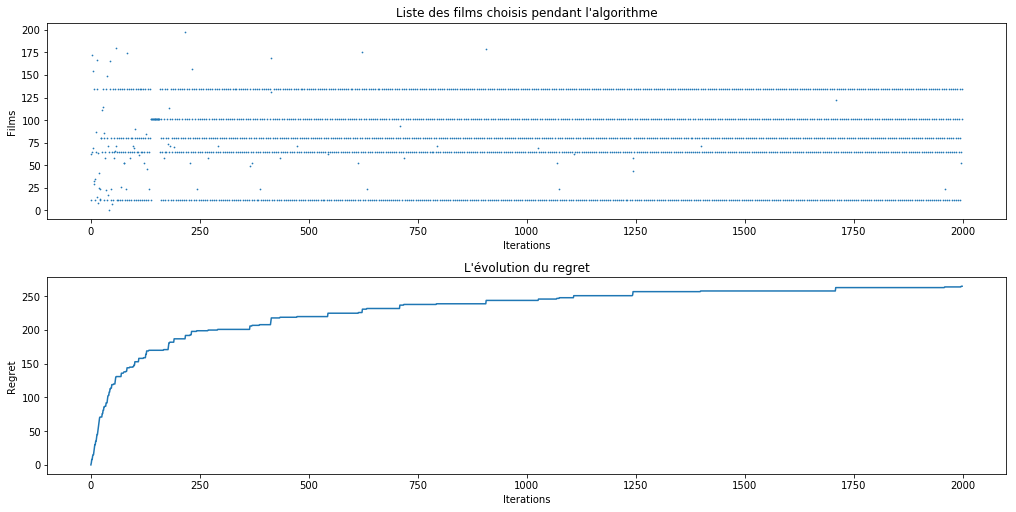

In [12]:
fig, axs = plt.subplots(2, 1, constrained_layout=True,figsize=(14,7))
axs[0].scatter(range(iterations),history,s=0.5)
axs[0].set_title("Liste des films choisis pendant l'algorithme")
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Films')

axs[1].plot(regret)
axs[1].set_title("L'évolution du regret")
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Regret')